# Edward / 0706022310025, Angeline / 0706022310006

In [1]:
# import library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree

In [2]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
col_names_to_analyze = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']

for col in col_names_to_analyze:
    print(f"Frequency distribution for column: {col}")
    print(df[col].value_counts())
    print("\n")

Frequency distribution for column: job
job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: count, dtype: int64


Frequency distribution for column: marital
marital
married     2797
single      1196
divorced     528
Name: count, dtype: int64


Frequency distribution for column: education
education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: count, dtype: int64


Frequency distribution for column: default
default
no     4445
yes      76
Name: count, dtype: int64


Frequency distribution for column: housing
housing
yes    2559
no     1962
Name: count, dtype: int64


Frequency distribution for column: loan
loan
no     3830
yes     691
Name: count, dtype: int64


Frequency distribution for column: month
month
may    1398
jul     706
aug     633
jun   

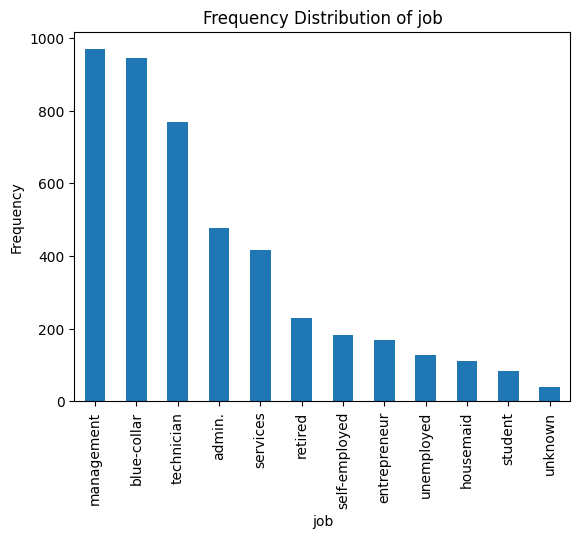

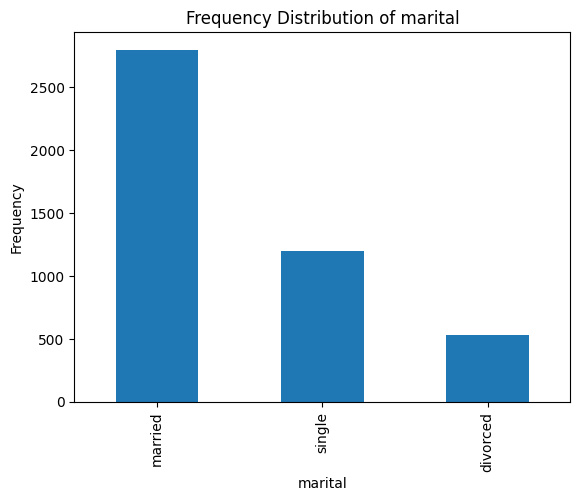

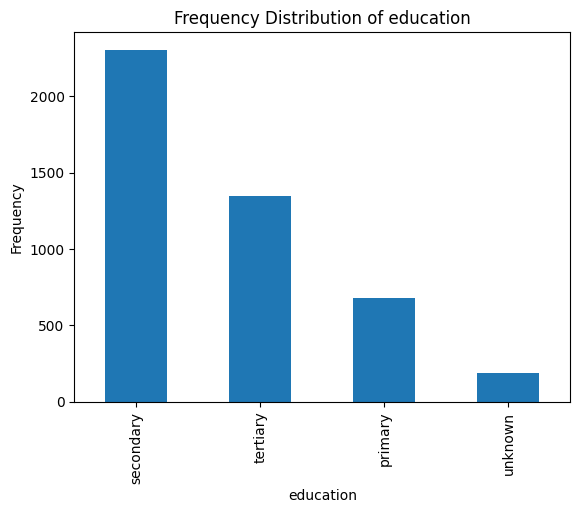

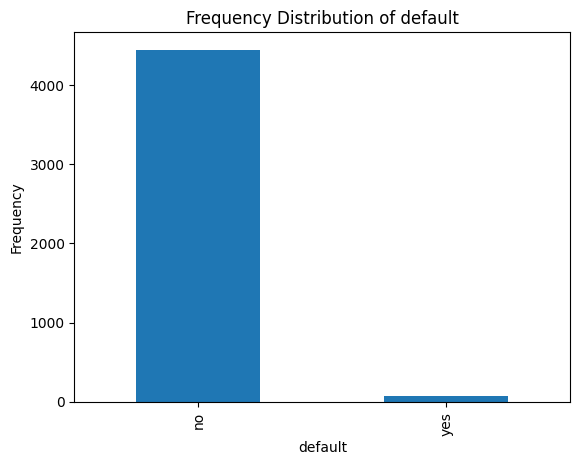

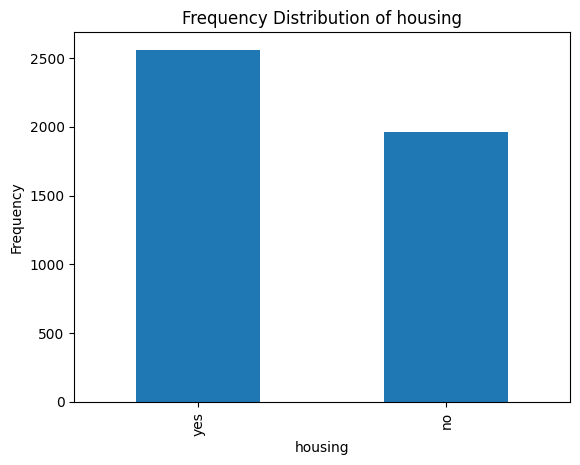

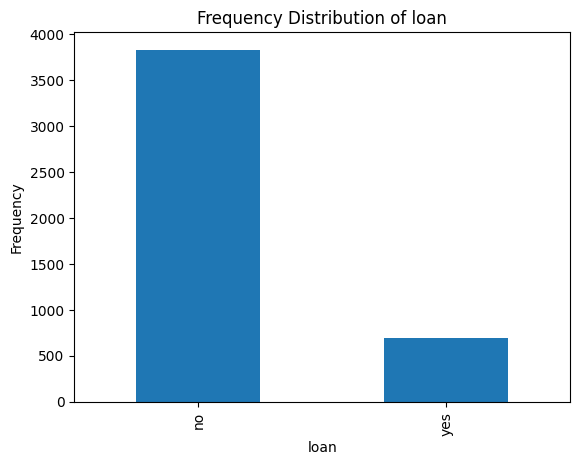

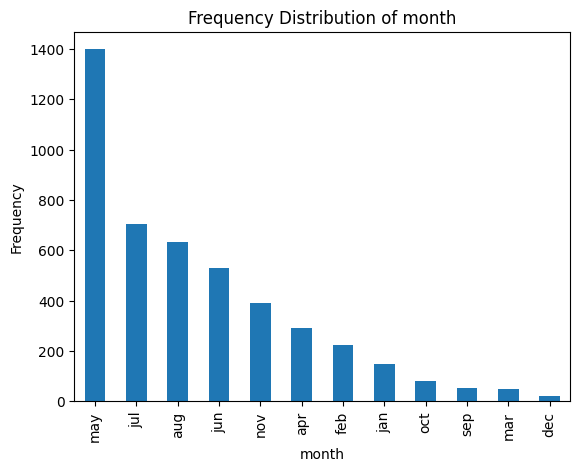

In [6]:
for col in col_names_to_analyze:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

*   job: The most common job categories are management, blue-collar, and technician, while 'unknown' jobs are the least frequent.

*   marital: The majority of individuals are married, followed by single, and then divorced.

*   education: Secondary education is the most common, followed by tertiary and primary education. There is also a small number of individuals with 'unknown' education levels.

*   default: The vast majority of individuals have no credit default.

*   housing: There are slightly more individuals with housing loans compared to those without.


*   loan: The majority of individuals do not have personal loans.

*   month: The months of May, July, and August have the highest number of entries, while December, March, and September have the lowest.










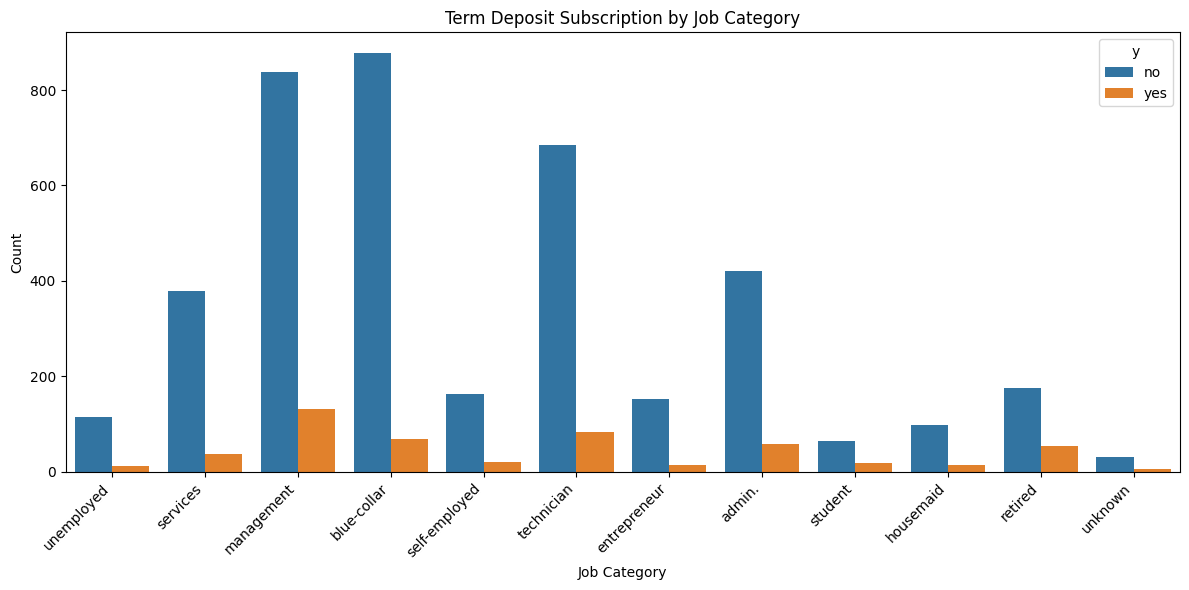

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='job', hue='y')
plt.title('Term Deposit Subscription by Job Category')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The plot clearly shows the distribution of both 'yes' (subscribed) and 'no' (did not subscribe) for each job category.
'Management' and 'Blue-collar' jobs have the highest overall number of individuals, but the proportion of subscriptions ('yes') within these categories seems relatively low compared to the number of non-subscriptions ('no').
'Retired' individuals appear to have a noticeably higher proportion of 'yes' subscriptions compared to 'no' subscriptions when looking at the bars for that category. This suggests retired people might be more likely to subscribe to a term deposit.
'Student' also shows a relatively higher proportion of 'yes' compared to 'no', indicating students might also be more receptive to term deposits.
Other categories like 'services', 'technician', 'admin.', 'self-employed', 'entrepreneur', and 'housemaid' have varying numbers of individuals, but the 'no' subscriptions significantly outweigh the 'yes' subscriptions in most of these categories.
The 'unemployed' category has a small number of individuals overall, with a low number of subscriptions.

# Preprocessing

In [8]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

In [9]:
columns_to_check = ['job', 'education', 'poutcome']

for col in columns_to_check:
    unknown_count = df[df[col] == 'unknown'].shape[0]
    print(f"Jumlah nilai 'unknown' di kolom '{col}': {unknown_count}")

Jumlah nilai 'unknown' di kolom 'job': 38
Jumlah nilai 'unknown' di kolom 'education': 187
Jumlah nilai 'unknown' di kolom 'poutcome': 3705


In [10]:
# Drop contact
# Drop previous
# Drop poutcome, because the unknown value is 3800 out of the 4000 datas

df = df.drop(columns=['contact', 'previous', 'poutcome'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   day        4521 non-null   int64 
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  y          4521 non-null   object
dtypes: int64(6), object(8)
memory usage: 494.6+ KB


The poutcome column had too many unknown values, about 3,705 out of 4,000, meaning it carried almost no useful information. So instead of filling it with meaningless data, it was better to drop it. We also removed contact and previous because they didn't add much value to the predictions, contact had mostly repetitive entries, while previous showed inconsistent numbers with no clear pattern. Dropping them helped simplify the dataset, reduce noise, and make the model perform more efficiently.

In [11]:
# Fill 'unknown' values in 'job' and 'education' with the mode
for col in ['job', 'education']:
    mode_value = df[col].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

Job and education columns are categorical and the number of unknown entries is small, only 38 and 187 out of thousands of rows, because it is categorical, the most reasonable way to handle missing values was to replace them with the mode, which represents the most frequent category in that column. By using the mode, it helps fill in the gaps without distorting the overall data distribution. We decided to fill it rather than dropping it as the data missing amount was small, and removing them could slightly reduce valuable information that still contributes to model accuracy.

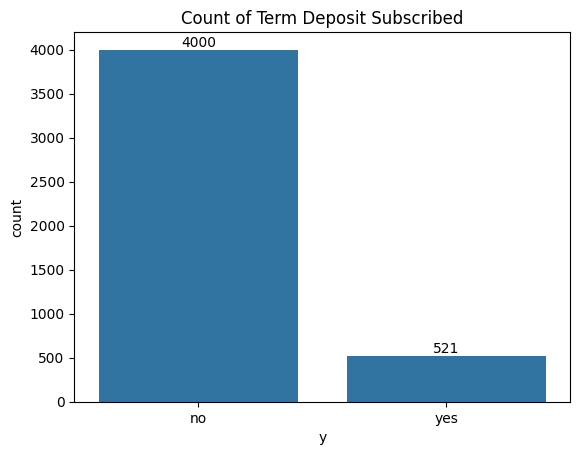

In [12]:
# show how many attrition
ax = sns.countplot(data=df, x='y')
plt.title('Count of Term Deposit Subscribed')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)
plt.show()

# imbalance dataset but it's okay let us try firsttt

In [13]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: default, housing, loan, y

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}

}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
df_encoded['month'] = df_encoded['month'].map(month_mapping)

# 2. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'marital', 'education']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 15)

{'education': {'primary': 0, 'secondary': 1, 'tertiary': 2},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10},
 'marital': {'divorced': 0, 'married': 1, 'single': 2}}


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,y
2664,48,0.0,0.0,1.0,0,-70,0,0,14,4,243,1,-1,0
1299,49,1.0,1.0,1.0,0,-55,0,0,17,5,150,3,-1,0
3024,49,4.0,0.0,2.0,0,1904,0,1,17,10,131,2,-1,0
451,35,0.0,0.0,1.0,0,-402,1,0,17,3,46,1,-1,0
2688,27,7.0,1.0,1.0,0,-1202,1,0,4,5,749,2,-1,0
4193,48,7.0,0.0,1.0,0,3186,0,1,9,3,104,1,-1,0
305,56,9.0,1.0,1.0,0,205,0,1,23,6,442,2,-1,0
14,31,1.0,1.0,1.0,0,360,1,1,29,0,89,1,241,0
1578,40,4.0,1.0,2.0,0,1041,1,0,12,5,73,1,-1,0
108,56,10.0,1.0,0.0,0,3391,0,0,21,3,243,1,-1,1


In [14]:
# checking encode result
df.loc[480]

,480
age,37
job,management
marital,single
education,secondary
default,no
balance,715
housing,yes
loan,no
day,20
month,may


## Separate features and target

### Subtask:
Define the features (X) and the target variable (y).


In [15]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [16]:
X.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays
0,30,10.0,1.0,0.0,0,1787,0,0,19,9,79,1,-1
1,33,7.0,1.0,1.0,0,4789,1,1,11,4,220,1,339
2,35,4.0,2.0,2.0,0,1350,1,0,16,3,185,1,330
3,30,4.0,1.0,2.0,0,1476,1,1,3,5,199,4,-1
4,59,1.0,1.0,1.0,0,0,1,0,5,4,226,1,-1


In [17]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


## Split data

### Subtask:
Split the encoded data into training and testing sets.


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 13), (1357, 13))

In [20]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays
565,40,9.0,1.0,1.0,0,56,1,1,29,0,194,1,247
3480,47,7.0,1.0,1.0,0,440,1,0,12,5,91,1,-1
2125,52,9.0,1.0,1.0,0,3554,0,1,8,6,89,1,-1
3452,31,0.0,1.0,1.0,0,0,1,0,29,6,82,5,-1
1667,33,1.0,1.0,1.0,0,-346,1,1,23,4,29,3,-1


In [21]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays
4274,35,1.0,1.0,0.0,0,378,1,0,16,4,427,3,-1
72,31,4.0,2.0,2.0,0,6248,1,0,9,4,154,2,-1
1065,30,10.0,1.0,2.0,0,0,1,0,18,10,756,1,-1
3185,42,0.0,1.0,1.0,0,529,1,1,19,10,193,3,-1
130,41,1.0,1.0,0.0,0,168,1,0,18,10,187,3,-1


# Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1190
           1       0.44      0.44      0.44       167

    accuracy                           0.86      1357
   macro avg       0.68      0.68      0.68      1357
weighted avg       0.86      0.86      0.86      1357



From the decision tree classifier, the result that we got for the training set is perfect (all 1.00). As for the test set, the model’s performance dropped a lot. For class no, it performed well (0.92), whereas for class yes, it only reached 0.44, it means rhat the model failed to identify many of the positive cases correctly. This imbalance suggests that the model is biased toward the majority class.

# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train_rf = rf_clf.predict(X_train)
y_pred_test_rf = rf_clf.predict(X_test)

# Print classification reports
print("\n=== Classification Report (Random Forest - Training Set) ===")
print(classification_report(y_train, y_pred_train_rf))

print("\n=== Classification Report (Random Forest - Test Set) ===")
print(classification_report(y_test, y_pred_test_rf))


=== Classification Report (Random Forest - Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Random Forest - Test Set) ===
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1190
           1       0.61      0.21      0.31       167

    accuracy                           0.89      1357
   macro avg       0.76      0.60      0.63      1357
weighted avg       0.86      0.89      0.86      1357



For the random forest classifier, the training set is also perfect, but on the test set, it reaches 0.89 accuracy and 0.94 F1-score for the majority class (0) and it struggled with the minority class (1), achieving only 0.31 in F1-score, meaning it still missed many positive predictions. This suggests the model slightly overfits and remains affected by class imbalance, though it is still better than the Decision Tree.

# XGBoost Classifier

In [24]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train_xgb = xgb_clf.predict(X_train)
y_pred_test_xgb = xgb_clf.predict(X_test)

# Print classification reports
print("\n=== Classification Report (XGBoost - Training Set) ===")
print(classification_report(y_train, y_pred_train_xgb))

print("\n=== Classification Report (XGBoost - Test Set) ===")
print(classification_report(y_test, y_pred_test_xgb))


=== Classification Report (XGBoost - Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2810
           1       1.00      1.00      1.00       354

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (XGBoost - Test Set) ===
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1190
           1       0.53      0.28      0.36       167

    accuracy                           0.88      1357
   macro avg       0.72      0.62      0.65      1357
weighted avg       0.86      0.88      0.86      1357



The XGBoost model also achieved a perfect score on the training set, showing it learned the patterns extremely well. On the test set, it reached 0.88 accuracy, which is slightly lower than Random Forest but still strong. It performed well in predicting the majority class (0) with an F1-score of 0.93 but struggled with the minority class (1), getting only 0.36 in F1-score. This means the model still faced issues identifying positive cases, likely due to class imbalance. However, compared to Decision Tree and Random Forest, XGBoost showed a more stable and consistent performance, suggesting it is better overall.

# Oversampling using SMOTENC

In [25]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan'
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X, y = smotenc.fit_resample(X, y)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((5600, 13), (2400, 13))

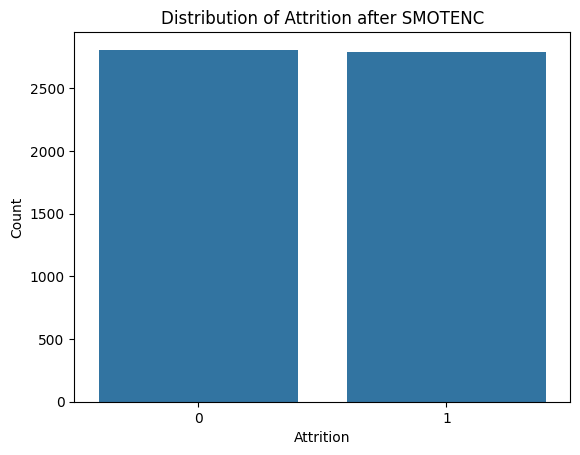

In [26]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y_train)
plt.title('Distribution of Attrition after SMOTENC')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

In [27]:
# BUILD CLASSIFICATION MODEL but with no parameters :(
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1192
           1       0.86      0.88      0.87      1208

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



After applying SMOTENC oversampling, the model achieved perfect performance on the training set (equal to 1.00). This means that the model was able to learn the training data exceptionally well, because of the balanced dataset created by SMOTENC. On the test set, the model achieved an accuracy of 0.86 with balanced precision and recall values for both classes. We can conclude that using SMOTENC helped the model better identify minority class instances that were previously underrepresented.

# KFold Cross Validation

In [28]:
# Lets split the data into 5 folds.
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split() method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 6400, Test set:1600
Fold:2, Train set: 6400, Test set:1600
Fold:3, Train set: 6400, Test set:1600
Fold:4, Train set: 6400, Test set:1600
Fold:5, Train set: 6400, Test set:1600


In [29]:
from sklearn.tree import DecisionTreeClassifier

score = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= kf, scoring="f1")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.87492298 0.8815871  0.88400488 0.85625389 0.88235294]
Average score: 0.88


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid to tune the hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'random_state': [0, 41, 42]
}

dtree_clf = DecisionTreeClassifier() # Initialize a decision tree classifier
grid_search = GridSearchCV(estimator=dtree_clf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search.fit(X_train, y_train)

best_dtree_clf = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred_test = best_dtree_clf.predict(X_test)

y_pred_train_dtree = best_dtree_clf.predict(X_train)
y_pred_test_dtree = best_dtree_clf.predict(X_test)

print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation f1 score: {:.3f}".format(grid_search.best_score_))

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}
Best cross-validation f1 score: 0.869

=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1192
           1       0.83      0.90      0.87      1208

    accuracy                           0.86      2400
   macro avg       0.86      0.86      0.86      2400
weighted avg       0.86      0.86      0.86      2400



We used 5-fold GridSearchCV to tune the Decision Tree, testing criterion (gini/entropy) and max_depth (1–10). The best model (gini, depth 10) got cross-validation F1 0.869. Training is perfect, and test F1 = 0.86, showing the tree generalizes well across folds without overfitting.

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42]
}

rf_clf = RandomForestClassifier() # Initialize a Random Forest classifier
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_rf.fit(X_train, y_train)

best_rf_clf = grid_search_rf.best_estimator_ # Get the best estimator from the grid search

y_pred_train_rf = best_rf_clf.predict(X_train)
y_pred_test_rf = best_rf_clf.predict(X_test)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
print("Best cross-validation f1 score for Random Forest: {:.3f}".format(grid_search_rf.best_score_))

print("\n=== Classification Report (Random Forest - Training Set) ===")
print(classification_report(y_train, y_pred_train_rf))

print("\n=== Classification Report (Random Forest - Test Set) ===")
print(classification_report(y_test, y_pred_test_rf))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest:  {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}
Best cross-validation f1 score for Random Forest: 0.916

=== Classification Report (Random Forest - Training Set) ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2808
           1       0.98      1.00      0.99      2792

    accuracy                           0.99      5600
   macro avg       0.99      0.99      0.99      5600
weighted avg       0.99      0.99      0.99      5600


=== Classification Report (Random Forest - Test Set) ===
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1192
           1       0.90      0.94      0.92      1208

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92  

We used 5-fold GridSearchCV to tune the Random Forest, testing n_estimators (100, 200, 300), max_depth (5, 10, 15), and max_features (sqrt/log2). The best model has 100 trees, depth 15, and sqrt features, achieving cross-validation F1 0.916. Training F1 = 0.99 and test F1 = 0.92 show the model learns patterns well and generalizes better than a single Decision Tree.

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to tune the hyperparameters for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'random_state': [42]
}

xgb_clf = XGBClassifier() # Initialize an XGBoost classifier
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb,
                            cv=5, n_jobs=-1, verbose=2, scoring='f1') # Use f1 scoring for classification
grid_search_xgb.fit(X_train, y_train)

best_xgb_clf = grid_search_xgb.best_estimator_ # Get the best estimator from the grid search

y_pred_train_xgb = best_xgb_clf.predict(X_train)
y_pred_test_xgb = best_xgb_clf.predict(X_test)

print("Best parameters for XGBoost: ", grid_search_xgb.best_params_)
print("Best cross-validation f1 score for XGBoost: {:.3f}".format(grid_search_xgb.best_score_))

print("\n=== Classification Report (XGBoost - Training Set) ===")
print(classification_report(y_train, y_pred_train_xgb))

print("\n=== Classification Report (XGBoost - Test Set) ===")
print(classification_report(y_test, y_pred_test_xgb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'random_state': 42}
Best cross-validation f1 score for XGBoost: 0.925

=== Classification Report (XGBoost - Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2808
           1       1.00      1.00      1.00      2792

    accuracy                           1.00      5600
   macro avg       1.00      1.00      1.00      5600
weighted avg       1.00      1.00      1.00      5600


=== Classification Report (XGBoost - Test Set) ===
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1192
           1       0.91      0.95      0.93      1208

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



We applied 5-fold GridSearchCV to tune XGBoost, exploring n_estimators (100–300), learning_rate (0.01–0.2), and max_depth (3–7) to balance learning speed and complexity. The best model (300 trees, depth 7, learning rate 0.1) achieved cross-validation F1 0.925. With perfect training F1 and test F1 = 0.93, XGBoost learns intricate patterns effectively and slightly outperforms Random Forest in generalization.

In [33]:
print("Feature importances:\n{}".format(tree.feature_importances_)) #function for feature importance

Feature importances:
[0.05811642 0.04400569 0.01422127 0.01313307 0.00059524 0.12018001
 0.06262167 0.04794883 0.06898065 0.063543   0.35690651 0.02449161
 0.12525602]


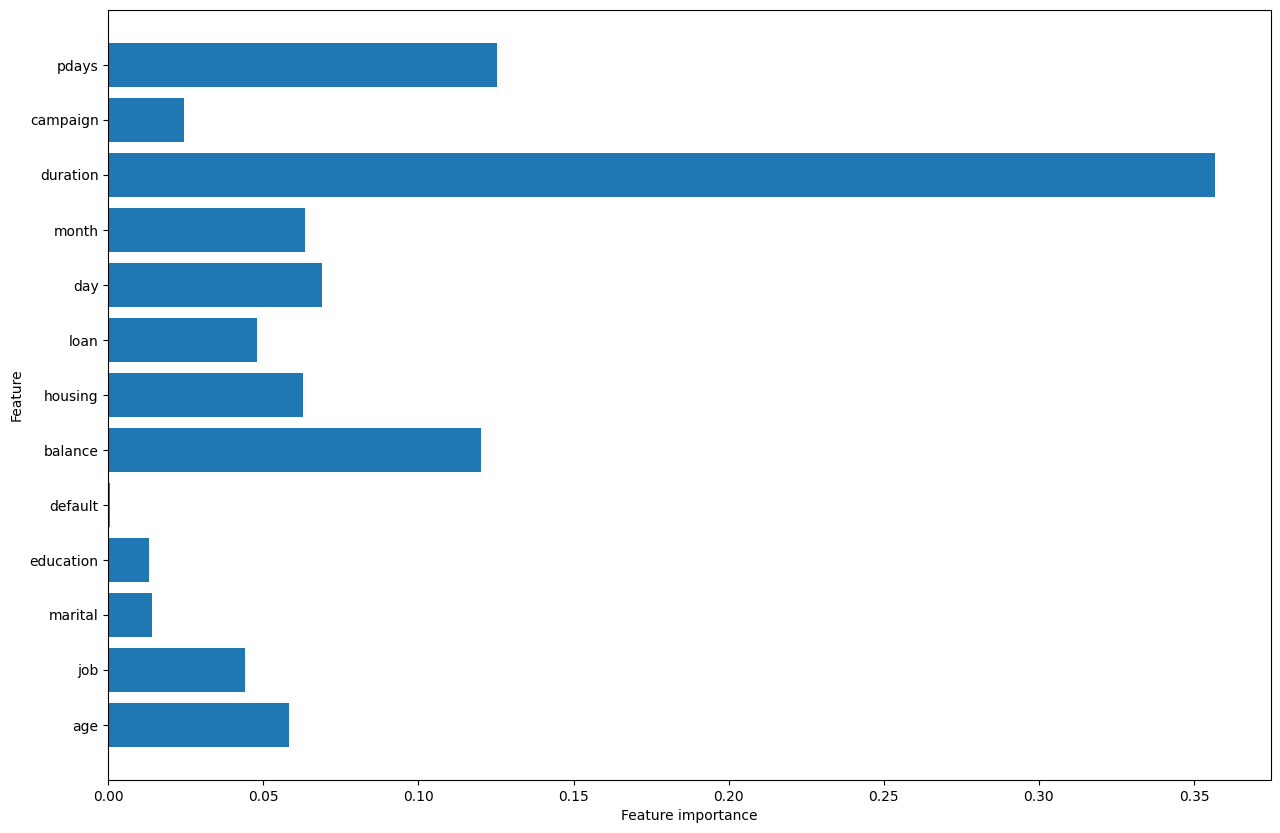

In [34]:
# visualize important features
def plot_feature_importances_attrition(model):
    plt.figure(figsize=(15,10))
    n_features = X_train.shape[1]  # Get the number of features from X_train
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns) # Use column names from X_train as labels
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_attrition(tree)

In [35]:
# Show feature importances greater than 0.05
feature_importances = pd.Series(tree.feature_importances_, index=X_train.columns)
important_features = feature_importances[feature_importances > 0.05].sort_values(ascending=False)
important_features

,0
duration,0.356907
pdays,0.125256
balance,0.120180
day,0.068981
month,0.063543
housing,0.062622
age,0.058116


In [36]:
# using only important features for the prediction
important_features = ["duration", "balance", "pdays",
    "day", "month", "housing", "age"]
X_importance = df_encoded[important_features] #input
y_importance = df_encoded['y'] #target

In [37]:
display(X_importance)
display(y_importance)

,duration,balance,pdays,day,month,housing,age
0,79,1787,-1,19,9,0,30
1,220,4789,339,11,4,1,33
2,185,1350,330,16,3,1,35
3,199,1476,-1,3,5,1,30
4,226,0,-1,5,4,1,59
...,...,...,...,...,...,...,...
4516,329,-333,-1,30,6,1,33
4517,153,-3313,-1,9,4,1,57
4518,151,295,-1,19,7,0,57
4519,129,1137,211,6,1,0,28


,y
0,0
1,0
2,0
3,0
4,0
...,...
4516,0
4517,0
4518,0
4519,0


In [38]:
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

importance_tree = DecisionTreeClassifier(random_state=42)
importance_tree.fit(X_train_importance, y_train_importance)

y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))


=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2795
           1       1.00      1.00      1.00       369

    accuracy                           1.00      3164
   macro avg       1.00      1.00      1.00      3164
weighted avg       1.00      1.00      1.00      3164


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1205
           1       0.41      0.41      0.41       152

    accuracy                           0.87      1357
   macro avg       0.67      0.67      0.67      1357
weighted avg       0.87      0.87      0.87      1357



Using only the selected important features, the Decision Tree achieves perfect training scores, but the test performance drops, especially for class 1 (y=1) with F1 = 0.41. Overall accuracy is 0.87, showing that while the model learns well on training data, it struggles to generalize for the minority class. This suggests that some omitted features may still contain useful information for predicting class 1, and using only the selected important features simplifies the model but reduces predictive power for rare outcomes.

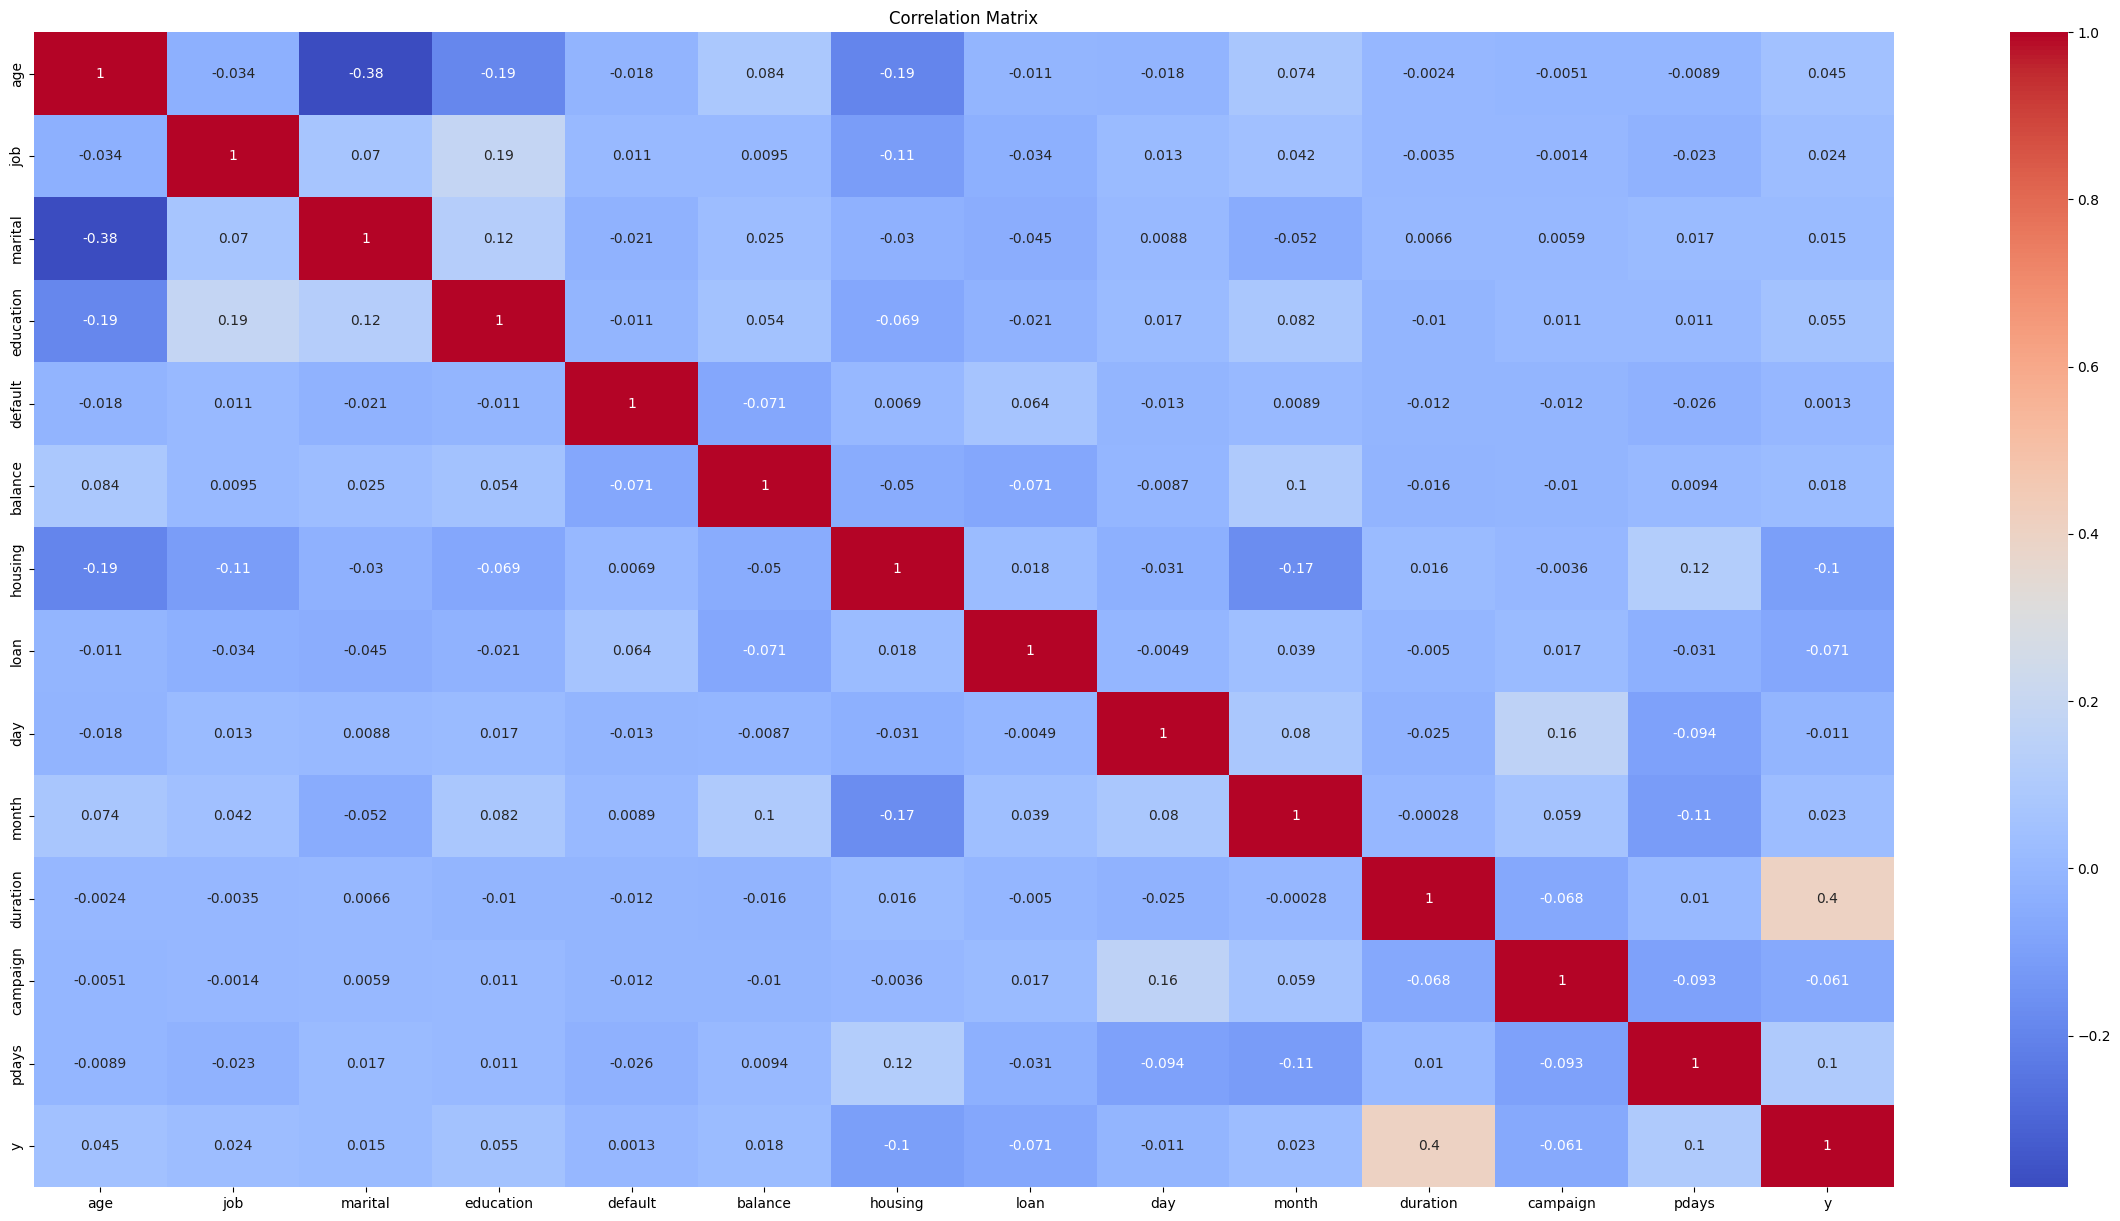

In [39]:
# show heatmap
plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows the correlation between features and the target after K-Fold Cross Validation. Duration has the highest positive correlation (0.4) with the target, indicating it's the most influential feature. Other features like pdays show minor influence, while most features (balance, education, day, month) have near-zero correlation, suggesting low linear impact. Correlations between features are generally low, indicating minimal multicollinearity. Overall, the heatmap provides a quick visual insight into which features are likely important for the model.

# Model Evaluation

In [40]:
# training set (no = 0)

import pandas as pd

# Membuat DataFrame kosong dengan kolom yang sesuai
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": ["1.00", "0.99", "1.00"],
    "Precision": ["1.00", "1.00", "1.00"],
    "Recall": ["1.00", "0.98", "1.00"],
    "F1-score": ["1.00", "0.99", "1.00"]
}

# Buat tabel
comparison_table = pd.DataFrame(data)

# Tampilkan tabel
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,1.00,1.00,1.00,1.00
1,Random Forest,0.99,1.00,0.98,0.99
2,XGBoost,1.00,1.00,1.00,1.00


In [41]:
# training set (yes = 1)

import pandas as pd

# Membuat DataFrame kosong dengan kolom yang sesuai
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": ["1.00", "0.99", "1.00"],
    "Precision": ["1.00", "0.98", "1.00"],
    "Recall": ["1.00", "1.00", "1.00"],
    "F1-score": ["1.00", "0.99", "1.00"]
}

# Buat tabel
comparison_table = pd.DataFrame(data)

# Tampilkan tabel
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,1.00,1.00,1.00,1.00
1,Random Forest,0.99,0.98,1.00,0.99
2,XGBoost,1.00,1.00,1.00,1.00


On the training set, all three models performed extremely well. Decision Tree and XGBoost achieved perfect scores across accuracy, precision, recall, and F1, while Random Forest was slightly lower in recall and F1. This shows that all models fit the training data very closely, capturing the patterns almost completely.

In [42]:
# testing set (no = 0)

import pandas as pd

# Membuat DataFrame kosong dengan kolom yang sesuai
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": ["0.86", "0.92", "0.93"],
    "Precision": ["0.89", "0.94", "0.95"],
    "Recall": ["0.82", "0.89", "0.91"],
    "F1-score": ["0.85", "0.91", "0.93"]
}

# Buat tabel
comparison_table = pd.DataFrame(data)

# Tampilkan tabel
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.86,0.89,0.82,0.85
1,Random Forest,0.92,0.94,0.89,0.91
2,XGBoost,0.93,0.95,0.91,0.93


In [43]:
# testing set (yes = 1)

import pandas as pd

# Membuat DataFrame kosong dengan kolom yang sesuai
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": ["0.86", "0.92", "0.93"],
    "Precision": ["0.83", "0.90", "0.91"],
    "Recall": ["0.90", "0.94", "0.95"],
    "F1-score": ["0.87", "0.92", "0.93"]
}

# Buat tabel
comparison_table = pd.DataFrame(data)

# Tampilkan tabel
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.86,0.83,0.90,0.87
1,Random Forest,0.92,0.90,0.94,0.92
2,XGBoost,0.93,0.91,0.95,0.93


On the test set, XGBoost achieved the highest scores, showing strong generalization with F1 = 0.93. Random Forest was close behind with F1 = 0.91–0.92, while Decision Tree scored lower with F1 = 0.85–0.87, indicating it overfit the training data and struggled more on unseen samples, especially for the minority class.

In [44]:
# rata-rata dari test set (yes and no)

import pandas as pd

# Membuat DataFrame kosong dengan kolom yang sesuai
data = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": ["0.86", "0.92", "0.93"],
    "Precision": ["0.86", "0.92", "0.93"],
    "Recall": ["0.86", "0.92", "0.93"],
    "F1-score": ["0.86", "0.92", "0.93"]
}

# Buat tabel
comparison_table = pd.DataFrame(data)

# Tampilkan tabel
comparison_table

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.86,0.86,0.86,0.86
1,Random Forest,0.92,0.92,0.92,0.92
2,XGBoost,0.93,0.93,0.93,0.93


# Discussions & Insights

● Which model performed best overall?

Ans: Overall, XGBoost achieved the best performance. It achieved 0.93, meaning that it made accurate predictions without serious overfitting. Although all models performed well on the training set, XGBoost remained strong when evaluated with new data. It achieved a suitable equilibrium, recognized sufficient patterns similar to Random Forest, but because of its regularization, it avoided merely memorizing the training data.

The second-most effective model was Random Forest with a 0.92. It also demonstrated robust generalization and nearly matched XGBoost's performance, although it had slightly reduced.

Lastly, Decision Tree ranked third, achieving an accuracy of 0.86. Though the training data is good (all 1.0), the lower test scores indicate overfitting, meaning that it was too focused on the training data and struggled to generalize to new, unseen data.

● Did ensemble methods (RF, XGBoost) improve performance compared to a single
Decision Tree?

Ans: Yes, the ensemble methods (Random Forest and XGBoost) have really helped in improving the performance compared to the single Decision Tree. Both ensemble models achieved higher accuracy, precision, recall, and F1-scores on the test data. Decision Tree only reached around 0.86 accuracy, while Random Forest and XGBoost went up to 0.92–0.93. This happens because ensemble methods combine multiple decision trees, which helps in reducing overfitting and capture more complex patterns in the data. The Decision Tree tends to memorize the training data, but Random Forest and XGBoost average or boost across many trees, so they make more stable and reliable predictions.

● How could the bank use these insights to refine its marketing strategy?

Ans: The bank can use these insights to build a better and more focused marketing strategy. Models like Random Forest and XGBoost can accurately predict which customers are more likely to respond positively, with this the bank can properly market towards those specific customers instead of reaching out to everyone. Selective targeting like this will help the bank reduce unnecessary marketing costs and also increase the likelihood of campaign success at the same time. By relying on the model's predictions, the bank can also design personalized offers or communication strategies that match customer needs and behaviors more closely, making each campaign more meaningful and effective.

Other than that, to understand what truly drives customer engagement, the bank can analyze which factors had the greatest influence on the model's decisions, such as age, income, or previous interactions, to understand. This information allows the  bank's marketing team to properly approach the customer based on their data. For example, if the model shows that frequent follow-ups lead to higher conversion rates, the bank can plan more consistent contact strategies. Overall, using these insights helps the bank move from intuition-based decisions to a data-driven marketing approach, improving both customer satisfaction and long-term business growth.